In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Aulas Data Science/Projetos Pessoais/Brain Tumor/brain_tumor_dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 203 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 50 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  7/100 ━━━━━━━━━━━━━━━━━━━━ 2:56 2s/step - accuracy: 0.4138 - loss: 0.8758

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.5192 - loss: 0.7921 - val_accuracy: 0.7600 - val_loss: 0.5724
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.7731 - loss: 0.5423 - val_accuracy: 0.7600 - val_loss: 0.5648
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.8271 - loss: 0.4553 - val_accuracy: 0.7400 - val_loss: 0.5537
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.8570 - loss: 0.4396 - val_accuracy: 0.7600 - val_loss: 0.5496
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.8576 - loss: 0.3711 - val_accuracy: 0.7400 - val_loss: 0.5497
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.8666 - loss: 0.3060 - val_accuracy: 0.8000 - val_loss: 0.4591
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9204 - loss: 0.2082 - val_accuracy: 0.8200 - val_loss: 0.4251
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.8970 - loss: 0.2766 - val_

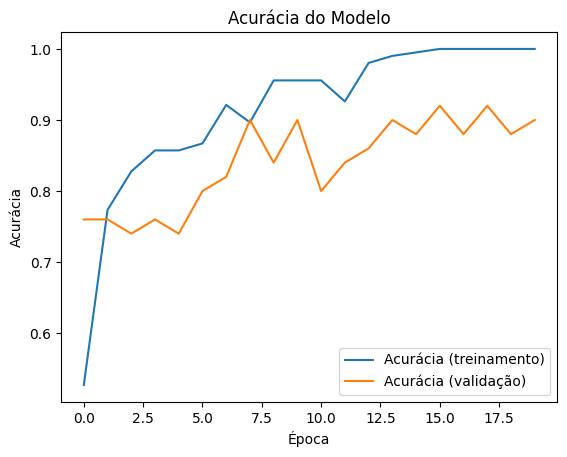

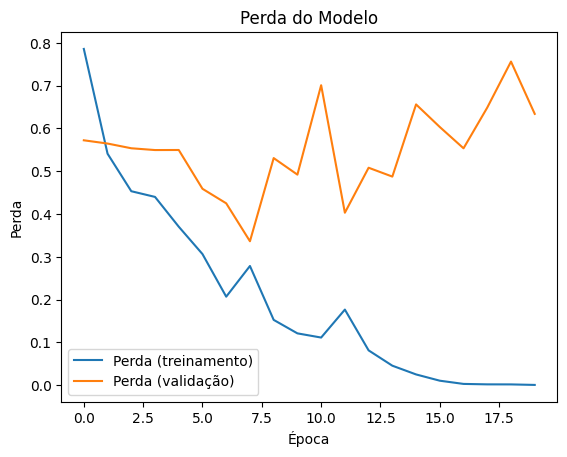

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia (treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda (treinamento)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()


In [21]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=50)

print(f'Acurácia final no conjunto de validação: {val_accuracy*100:.2f}%')


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9007 - loss: 0.6317   
Acurácia final no conjunto de validação: 90.00%


Saving 21 no.jpg to 21 no.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


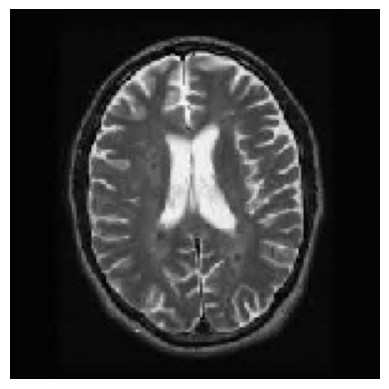


✅ A imagem está livre de tumor cerebral.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

plt.imshow(img)
plt.axis('off')
plt.show()

if prediction[0] > 0.5:
    print("\n🧠 A imagem mostra um tumor cerebral!")
else:
    print("\n✅ A imagem está livre de tumor cerebral.")
